Author: __Antonio Vecoli__

Date: __03/02/2017__

__Tech For Space__  [www.techforspace.com](https://www.techforspace.com/)

__License: MIT License__

For any technical or Python support please refer to our [__Project Page__](https://www.techforspace.com/project/sentinels-earth-observation/)


# Handling a Sentinel-2 product with SNAP in Python (Tutorial 1)

This is the first of a series of tutorials that will provide exhausting and interactive training material focused on Python image processing, integrated with the exploitation of the ESA SNAP toolbox. SNAP has been designed with the goal to provide a common architecture for all the toolboxes created for the scientific processing of the Sentinels data products and it is really interesting to look at the usage of its Java API in the Python programming.

## Loading and reading a Sentinel2 data product

This first tutorial will explain some basic operations that can be implemented in Python on a Sentinel2 data product by directly accessing the Java API of the SNAP toolbox. Before starting with the whole explanation it is necessary to download  the Sentinel-2 product that will be used as an example. Here it is provided the link to the selected data contained in the open access Sentinels archive: 

https://scihub.copernicus.eu/dhus/odata/v1/Products('c94ebae2-3b0d-4472-96a0-324bb54d7bdf')/$value

If the data product is opened with the desktop version of SNAP and we decide to visualize the image related to a single band,(band 5 in this example) we obtain the following full view : 

<img src="tutorial1_image1.jpg">


The image displayed is the grey-scaled version of a single band and this band visualization could be implemented also for the other available bands that have been listed in the small window on the left. The same result can be obtained also in Python in some lines of code, without running the desktop version of SNAP.
The first step is to import from the SNAP API the class that enables read/write operations on a S-2 product:

In [24]:
from snappy import ProductIO

Now the data product can be easily readed  in Python if its folder have been stored in the current working  directory of his Jupyter session. In this case we can operate as follows:

In [25]:
file_path = 'C:\Program Files\snap\S2A_MSIL1C_20170202T090201_N0204_R007_T35SNA_20170202T090155.SAFE\MTD_MSIL1C.xml'
product = ProductIO.readProduct(file_path)

The product can be always loaded and readed by selecting the MTD_MSIL1C.xml file when it is present. If this file is missing it means that the user must select the .xml file with the same name of the product. But this aspect will be better explained in one of the next tutorials. 
If the user want work with these lines of code out of a Jupyter Notebook( for example in a Python console), the data product should be stored in the related current working directory, otherwise the __file_path__ variable should contain the full path of the .xml file.

Now it is possible to verify that the product has been properly readed by trying to visualize the list of all the bands included in the data:

In [26]:
list(product.getBandNames())

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B9',
 'B10',
 'B11',
 'B12',
 'view_zenith_mean',
 'view_azimuth_mean',
 'sun_zenith',
 'sun_azimuth',
 'view_zenith_B1',
 'view_azimuth_B1',
 'view_zenith_B2',
 'view_azimuth_B2',
 'view_zenith_B3',
 'view_azimuth_B3',
 'view_zenith_B4',
 'view_azimuth_B4',
 'view_zenith_B5',
 'view_azimuth_B5',
 'view_zenith_B6',
 'view_azimuth_B6',
 'view_zenith_B7',
 'view_azimuth_B7',
 'view_zenith_B8',
 'view_azimuth_B8',
 'view_zenith_B8A',
 'view_azimuth_B8A',
 'view_zenith_B9',
 'view_azimuth_B9',
 'view_zenith_B10',
 'view_azimuth_B10',
 'view_zenith_B11',
 'view_azimuth_B11',
 'view_zenith_B12',
 'view_azimuth_B12']

If the operation is successful a list of string should have been displayed. In particular we are interested in elements going from B1 to B12, where each string corresponds to the name of a single band. At this point it can be useful to extract the size of the raster associated to a single band, and that can be done after extracting the selected band and storing it in a separate variable:

In [27]:
B5 = product.getBand('B5')


The __getBand__ method requires the name of the band as a string object and returns the selected band as an independent object. We can now get the size of the raster: 

In [28]:
Width = B5.getRasterWidth()
Height = B5.getRasterHeight()
print(Width,Height)

(5490L, 5490L)


The data of Band 5 are now completely available and it is then possible to go on and try to visualize its related image directly in Python. Python can easily handle images as bidimensional arrays with the Numpy library, and the snappy module allows us to store the band data in a numpy array thanks to the specific method __readPixels__

In [29]:
import numpy as np
B5_data = np.zeros(Width*Height, dtype = np.float32)
B5.readPixels(0,0,Width,Height,B5_data)
B5_data.shape = (Height,Width)


This operation should have last some seconds and at the end the user could try to verify the shape of the B5_data array to confirm that everything has been done correctly so far. B5_data is now a bidimensional array that can be handled with every type of operation or image processing technique. In this case we are just going to visualize the band as an image in its grey-scaled version. The image will be displayed using the Matplotlib package:

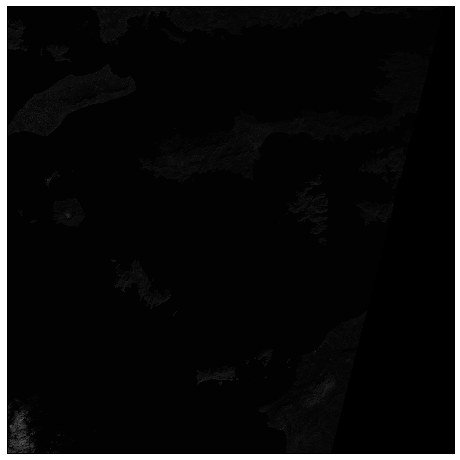

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.figure(figsize=(8, 8))                 # adjusting the figure window size
fig = plt.imshow(B5_data, cmap = cm.gray)  #matplotlib settings for the current image
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()


The image obtained is the same of the SNAP toolbox view showed at the beginning, but there is noticeable difference in the contrast between the two results. It is possible to apply some contrast enhancement technique to process our last image so that we obtain the same result of the desktop SNAP. A very useful Python package that allows to play with contrast enhancement is surely the __scikit-image__ package.

In [31]:
import skimage.exposure as exposure
val1,val2 = np.percentile(B5_data, (2.5,97.5))
B5_data_new = exposure.rescale_intensity(B5_data, in_range=(val1,val2))

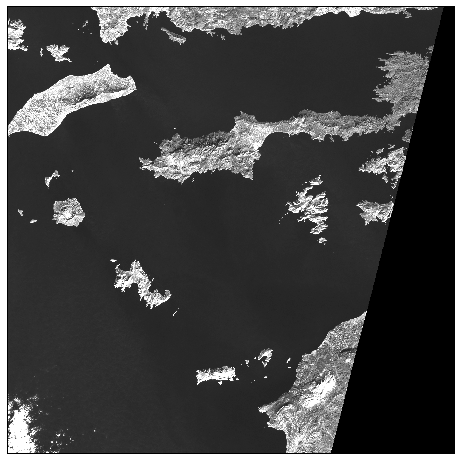

In [32]:
plt.figure(figsize=(8, 8))                     
fig = plt.imshow(B5_data_new, cmap = cm.gray)  
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

With the last lines of code we have saturated the 5% of all the pixels, saturating the same portion of lowest and highest pixel values. The obtained result is really close to the one of the SNAP toolbox. The image further improved eliminating the black part on the right that has been automatically ignored in SNAP, but that goes beyond the main topic of this first tutorial. It has been explained how it is possible to store the band data properly in a numpy array and the related image visualization shows that the result is consistent with what is obtained in the SNAP toolbox. This is just a starting point for a large number of applications and further developments will be explained in the next tutorials.

The user could try to go deep into this tutorial trying on his own to implement the operations showed above to other bands, and noticing the differences or the common aspects that could come out during the implementation

Credits:

[Esa STEP](http://step.esa.int/main/) 

__Produced from ESA remote sensing data__ : [scihub.copernicus.eu](https://scihub.copernicus.eu/)